In [16]:
%reload_ext autoreload
%autoreload 2
from read_data_py import *
from math_py import *
from plot_py import *
from skeleton_py import *
from slice_py import *

%matplotlib notebook

In [27]:
dir_ = "C:/datalogiKU/project/Jon/statistik/"
#filename_CT = '18_267b3af02b.nii.gz'
#filename_st = '18_ts.nii.gz_1.nrrd'

#filename_CT = '19_2ea53c0f55.nii.gz'
#filename_st = '19_ts.nii.gz-Segment_57-label.nrrd'

#filename_CT = '17_c501c98c70.nii.gz'
#filename_st = '17_ts.nii.gz_1-Segment_57-label.nrrd'

filename_CT = '15_cf99ce65b4.nii.gz'
filename_st = '15_ts.nii.gz-Segment_57-label.nrrd'

#filename_CT = '13_ef4cf0ef0c.nii.gz'
#filename_st = '13_ts.nii.gz-Segment_57-label.nrrd'

data_CT,affine = read_CT(dir_, filename_CT)
vx_colon= read_st(dir_,filename_st, volumn_threshold = 800)

CT size is , (512, 147, 772)
scale is  [0.8964844  1.9999969  0.89637303]
Affine array is 
 [[-8.92486453e-01  1.70143843e-01  3.65459584e-02  1.79636017e+02]
 [ 7.62003586e-02  1.99274659e+00 -3.12028849e-03  2.63281274e+00]
 [ 3.66834775e-02  0.00000000e+00  8.95622313e-01  1.24606689e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


<IPython.core.display.Javascript object>


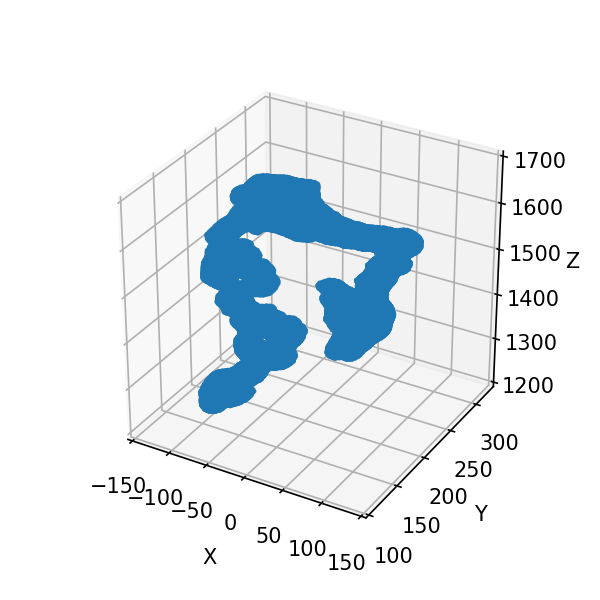

In [29]:
plot_arr(vx_colon,affine)

<IPython.core.display.Javascript object>


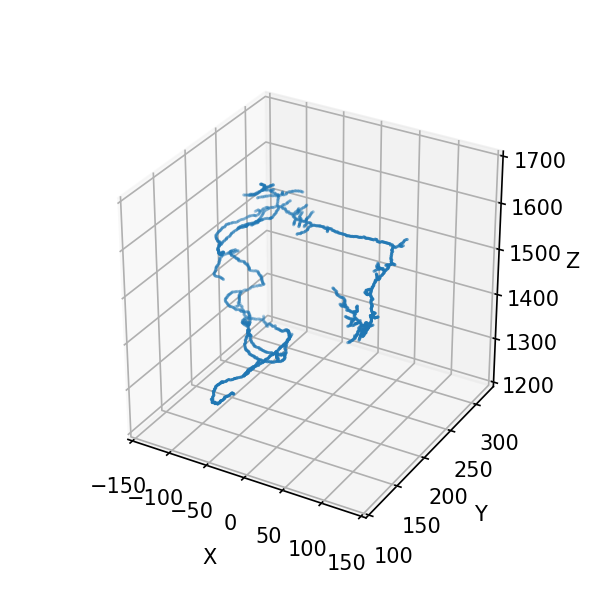

<IPython.core.display.Javascript object>


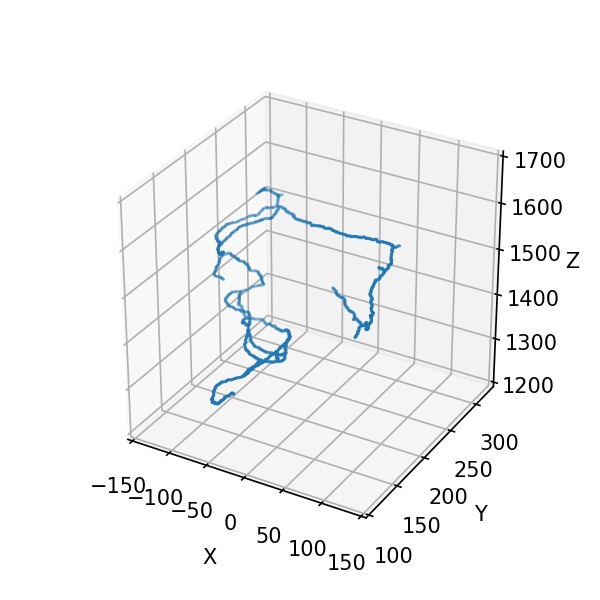

<IPython.core.display.Javascript object>


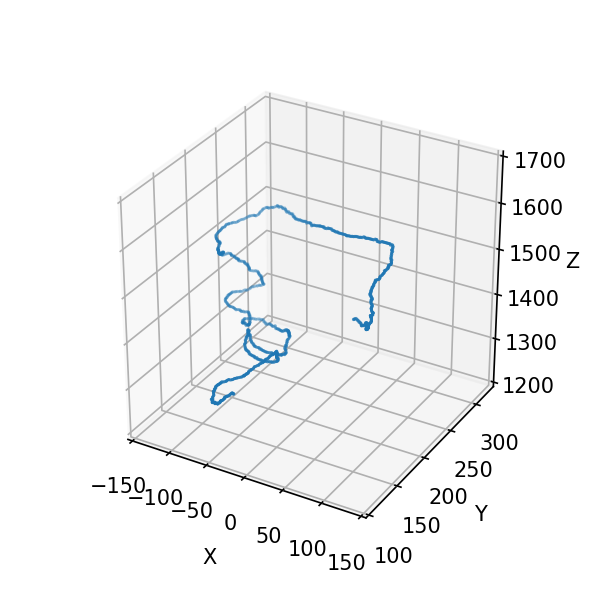

In [30]:
skeleton_points = trunk_of_skeleton(vx_colon, affine)

<IPython.core.display.Javascript object>


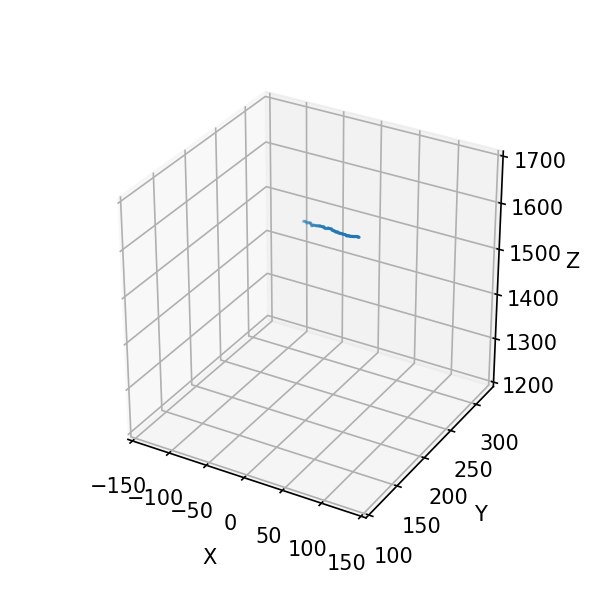

In [31]:
#chosen_sg = (-40, 40, 230, 270, 1500, 1700)
chosen_sg = (-40, 40, 230, 270, 1500, 1700)
skeleton_points_sg = take_sg_from_skeleton(skeleton_points, chosen_sg)
plot_points(skeleton_points_sg)

In [32]:
N,_ = skeleton_points_sg.shape 
z = np.array([0,0,1])
interval = 6
ls = np.arange(2, N-1, interval)
L = len(ls)
half_side_a = 120 #  r
half_side_b = 120
#sigma = 6

<IPython.core.display.Javascript object>


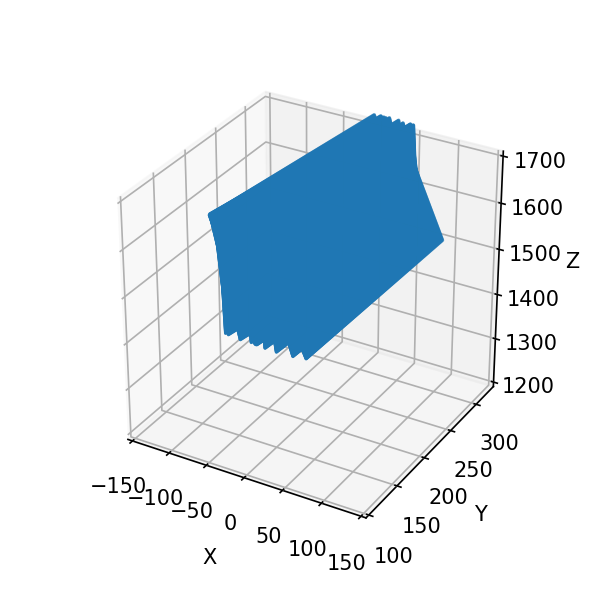

In [34]:
# select slices
slice_grids_points = determine_slice_points(ls, z, skeleton_points_sg,  half_side_a, half_side_b)

grid_n_skeleton = np.vstack((skeleton_points_sg, slice_grids_points) )
plot_points(grid_n_skeleton)

#interpolation
HU_itp = interpolate(data_CT, slice_grids_points, affine)

In [35]:
# find the intersection between colon surface and slice
idx_X_lst = surface_X_slice(slice_grids_points, vx_colon, affine, L, half_side_a, half_side_b)

Be patient. It will take some time to calculate the array of min distance to colon


<IPython.core.display.Javascript object>


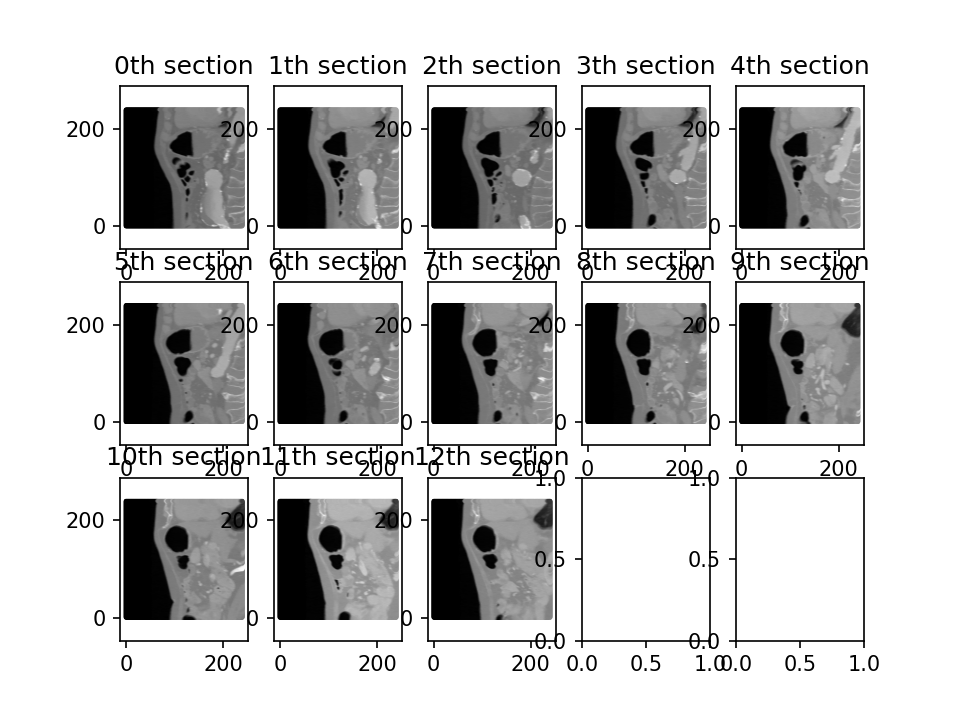

In [36]:
#plot sections, figures are also saved in file
plot_section(L, half_side_a, half_side_b, idx_X_lst, HU_itp, dir_, filename_CT, threshold_HU = -400)